In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:40<00:00, 26.8MB/s]
100% 1.06G/1.06G [00:40<00:00, 28.4MB/s]


In [ ]:
import zipfile

# Open the zip file using the zipfile module
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    # Extract the contents of the zip file
    zip_ref.extractall('/content')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

# Rest of the code...

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
# normalize
def process(image, label):
  image= tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)


In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1, activation='sigmoid'))








In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 98s 153ms/step - loss: 1.0458 - accuracy: 0.6676 - val_loss: 0.4773 - val_accuracy: 0.7782
Epoch 2/10
625/625 [==============================] - 87s 139ms/step - loss: 0.5057 - accuracy: 0.7606 - val_loss: 0.4822 - val_accuracy: 0.7742
Epoch 3/10
625/625 [==============================] - 86s 138ms/step - loss: 0.4834 - accuracy: 0.7799 - val_loss: 0.5352 - val_accuracy: 0.7564
Epoch 4/10
625/625 [==============================] - 85s 135ms/step - loss: 0.3870 - accuracy: 0.8251 - val_loss: 0.4004 - val_accuracy: 0.8338
Epoch 5/10
625/625 [==============================] - 83s 133ms/step - loss: 0.3058 - accuracy: 0.8692 - val_loss: 0.9626 - val_accuracy: 0.7643
Epoch 6/10
625/625 [==============================] - 97s 155ms/step - loss: 0.2505 - accuracy: 0.8953 - val_loss: 0.2737 - val_accuracy: 0.8930
Epoch 7/10
625/625 [==============================] - 89s 142ms/step - loss: 0.1769 - accuracy: 0.9295 - val_loss: 0.3150 - val_ac

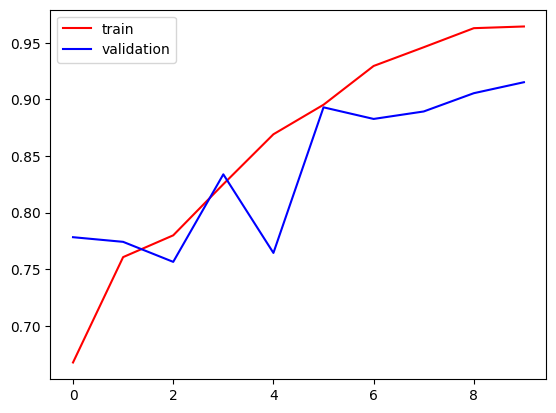

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

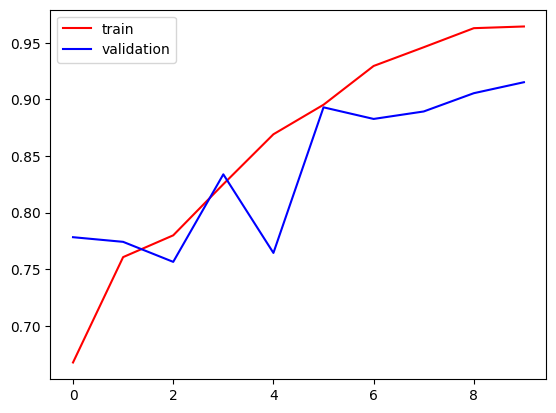

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

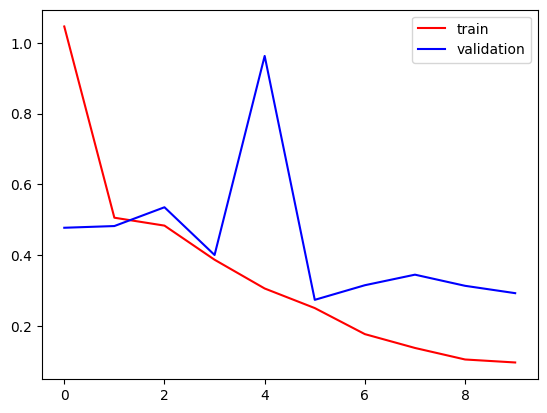

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

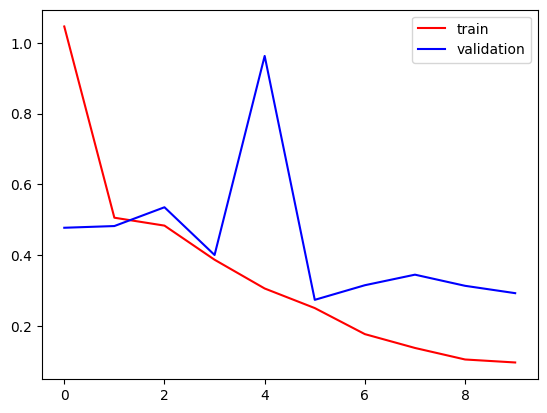

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

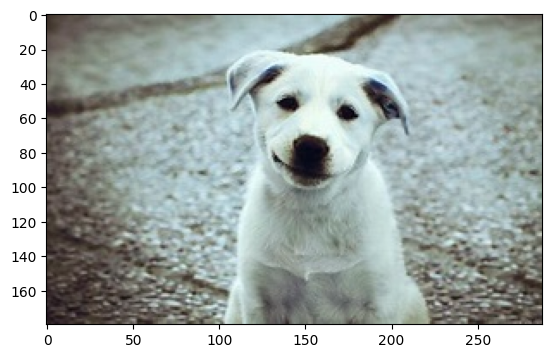

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(180, 288, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.9590432]], dtype=float32)